## Task Steps:

### Step 1: Load and Prepare the Raw Text Dataset

1. Load the raw text data.
2. Convert the data into a DataFrame format suitable for the apriori algorithm (True/False for each item in columns).

### Step 2: Visualize Item Frequencies

1. Create a DataFrame containing items and their frequencies.
2. Plot the top 10 items with the highest frequencies.

### Step 3: Apply Apriori Algorithm for Association Mining

1. Utilize the apriori algorithm on the dataset prepared in the step 1 to determine item frequencies.
2. Use these frequencies as input to the association rules function to discover associations.

### Step 4: Visualize Association Rules

1. Plot the confidence values for the discovered association rules.
2. Eliminate duplicates, as lift and support will be similar for rules of the type A -> B and B -> A.
3. Visualize lift and support metrics for the association rules.

By following these steps, we aim to load, process, and analyze the raw text dataset using the apriori algorithm to discover interesting association rules among the items.


In [16]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#Reading the file

file_p = 'Data/groceries.txt'
data_items = []

with open(file_p,'r') as f:
    for line in f:
        items = line.strip().split(',')
        data_items.append(items)

In [3]:
unique_items = set(item for sublist in data_items for item in sublist)

# Initialize an empty dictionary to store the data
data_dict = {item: [] for item in unique_items}

# Populate the dictionary with True/False values
for item in unique_items:
    for sublist in data_items:
        data_dict[item].append(item in sublist)

# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)

In [4]:
all_items = [item for sublist in data_items for item in sublist]

item_counts = pd.Series(all_items).value_counts()

freq_df = pd.DataFrame({'Item': item_counts.index, 'Frequency': item_counts.values})

freq_df.head(20)

,Item,Frequency
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [5]:
freq_df30 = freq_df.head(30)
fig = px.treemap(freq_df30, path=['Item'], values='Frequency', color='Frequency',
                 color_continuous_scale='viridis', title='Item Frequency Treemap',
                 hover_data=['Frequency']) 

fig.show()

/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



**Notable Items Frequented:**

Based on the data analysis, it's apparent that "whole milk" and "other vegetables" are the most frequently purchased items. Following closely are "rolls/buns", "soda", "yogurt", and "bottled water". These items are likely to be prominent as we explore potential associations using the apriori algorithm.


In [9]:
#Applying Apriori Algorithm on all items

frq_items = apriori(df, min_support = 0.005, use_colnames=True)
print(frq_items.sort_values(by='itemsets',ascending=False))

rules = association_rules(frq_items, metric="lift", min_threshold=3)
rules.sort_values(by='lift',ascending=False)

      support                                           itemsets
0    0.033249                                          (berries)
672  0.007626                           (pip fruit, brown bread)
659  0.005084                    (other vegetables, canned fish)
660  0.018709                    (other vegetables, brown bread)
661  0.013116                  (other vegetables, cream cheese )
..        ...                                                ...
338  0.005694             (fruit/vegetable juice, cream cheese )
339  0.006914                   (fruit/vegetable juice, napkins)
340  0.010066                   (fruit/vegetable juice, sausage)
341  0.009049        (fruit/vegetable juice, whipped/sour cream)
999  0.005592  (other vegetables, yogurt, whole milk, whipped...

[1000 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
126,"(whole milk, tropical fruit)","(yogurt, root vegetables)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712,0.843841
121,"(yogurt, root vegetables)","(whole milk, tropical fruit)",0.025826,0.042298,0.005694,0.220472,5.212371,0.004602,1.228567,0.829573
125,"(root vegetables, tropical fruit)","(yogurt, whole milk)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059,0.809957
122,"(yogurt, whole milk)","(root vegetables, tropical fruit)",0.056024,0.021047,0.005694,0.101633,4.828814,0.004515,1.089703,0.839969
182,"(other vegetables, whole milk)","(root vegetables, pip fruit)",0.074835,0.015557,0.005491,0.073370,4.716272,0.004326,1.062390,0.851705
...,...,...,...,...,...,...,...,...,...,...
72,"(yogurt, whole milk)",(butter),0.056024,0.055414,0.009354,0.166969,3.013104,0.006250,1.133914,0.707769
63,(butter),"(citrus fruit, whole milk)",0.055414,0.030503,0.005084,0.091743,3.007645,0.003394,1.067426,0.706674
62,"(citrus fruit, whole milk)",(butter),0.030503,0.055414,0.005084,0.166667,3.007645,0.003394,1.133503,0.688516
32,"(yogurt, root vegetables)",(tropical fruit),0.025826,0.104931,0.008134,0.314961,3.001587,0.005424,1.306594,0.684521


**Adjusting Support and Lift Thresholds:**

Given the substantial size of our dataset and the numerous items within it, we have set a relatively lower support value. This choice enables us to explore a wider range of possible associations. By maintaining a support value of less than 0.01, we ensure that we retain a larger set of filtered items, fostering the discovery of potential associations.

For lift values, our goal is to identify pairs that exhibit robust and meaningful associations, characterized by strong relationships. To this end, we've set a threshold of 3 for lift. This criterion helps us focus on pairs of items that exhibit particularly compelling connections.


In [13]:
rules['rules_ass'] = rules.apply(lambda row: f"{', '.join(row['antecedents'])} -> {', '.join(row['consequents'])}", axis=1)
rules.sort_values(by='lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules_ass
126,"(whole milk, tropical fruit)","(yogurt, root vegetables)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712,0.843841,"whole milk, tropical fruit -> yogurt, root veg..."
121,"(yogurt, root vegetables)","(whole milk, tropical fruit)",0.025826,0.042298,0.005694,0.220472,5.212371,0.004602,1.228567,0.829573,"yogurt, root vegetables -> whole milk, tropica..."
125,"(root vegetables, tropical fruit)","(yogurt, whole milk)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059,0.809957,"root vegetables, tropical fruit -> yogurt, who..."
122,"(yogurt, whole milk)","(root vegetables, tropical fruit)",0.056024,0.021047,0.005694,0.101633,4.828814,0.004515,1.089703,0.839969,"yogurt, whole milk -> root vegetables, tropica..."
182,"(other vegetables, whole milk)","(root vegetables, pip fruit)",0.074835,0.015557,0.005491,0.073370,4.716272,0.004326,1.062390,0.851705,"other vegetables, whole milk -> root vegetable..."
...,...,...,...,...,...,...,...,...,...,...,...
72,"(yogurt, whole milk)",(butter),0.056024,0.055414,0.009354,0.166969,3.013104,0.006250,1.133914,0.707769,"yogurt, whole milk -> butter"
63,(butter),"(citrus fruit, whole milk)",0.055414,0.030503,0.005084,0.091743,3.007645,0.003394,1.067426,0.706674,"butter -> citrus fruit, whole milk"
62,"(citrus fruit, whole milk)",(butter),0.030503,0.055414,0.005084,0.166667,3.007645,0.003394,1.133503,0.688516,"citrus fruit, whole milk -> butter"
32,"(yogurt, root vegetables)",(tropical fruit),0.025826,0.104931,0.008134,0.314961,3.001587,0.005424,1.306594,0.684521,"yogurt, root vegetables -> tropical fruit"


#### Let's look at top 10 associations based on confidence

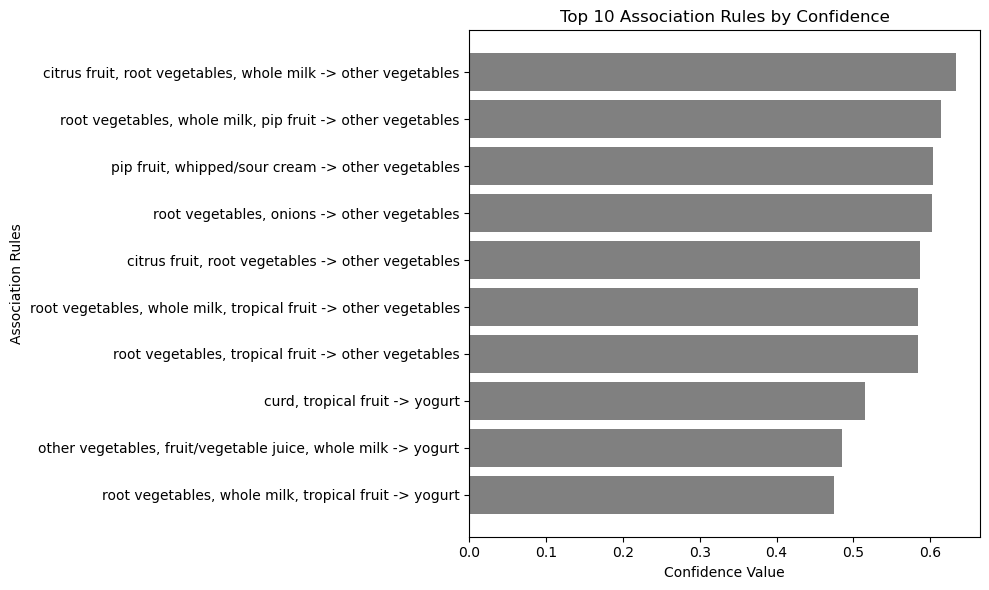

In [24]:
top_rules = rules.nlargest(10, 'confidence')

associations = top_rules['rules_ass']
con_values = top_rules['confidence']

plt.figure(figsize=(10, 6))
plt.barh(associations, con_values, color='grey')
plt.xlabel('Confidence Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Confidence')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

**Interpreting Confidence Results:**

The prominence of the "Other vegetable" item within our dataset explains its appearance among the top 7 frequent items. The associations we've identified align with our expectations. For instance, it's logical that customers who purchase fruits and vegetables might also opt for "Other vegetable" items. This observation suggests a pattern where customers who buy certain produce items tend to choose other vegetable options as well.

Similarly, another meaningful association emerges – customers who purchase various dairy products, such as milk and curd, demonstrate a likelihood to also select yogurt. This connection aligns with common consumption habits and preferences, indicating that customers interested in dairy products extend their choices to include related items.

In essence, our analysis is revealing associations that resonate with intuitive shopping behavior, shedding light on purchasing patterns and connections that customers naturally exhibit.


#### Let's look at top 10 associations based on lift

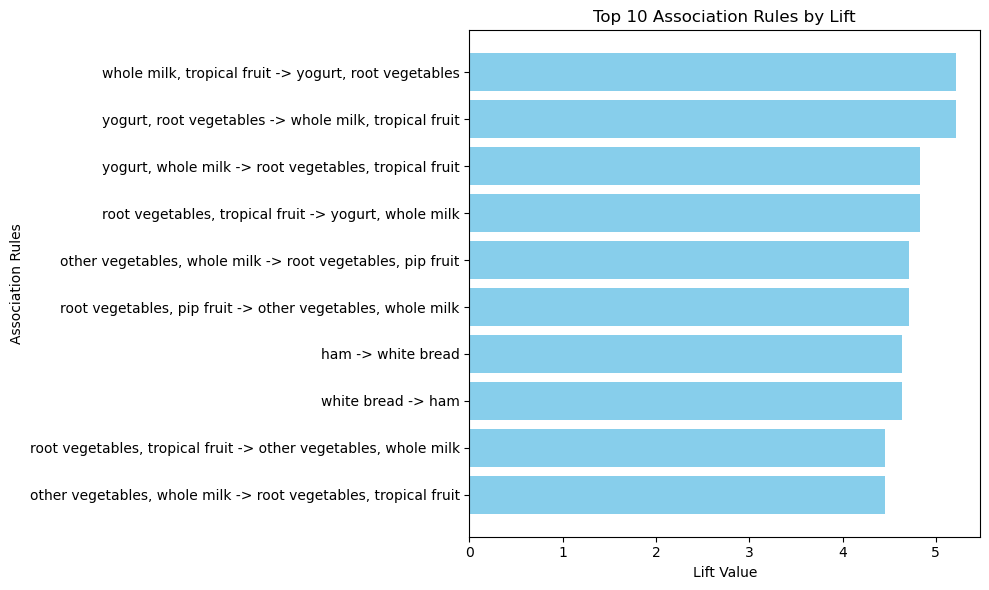

In [17]:
top_rules = rules.nlargest(10, 'lift')

associations = top_rules['rules_ass']
lift_values = top_rules['lift']

plt.figure(figsize=(10, 6))
plt.barh(associations, lift_values, color='skyblue')
plt.xlabel('Lift Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest lift at the top
plt.tight_layout()

plt.show()

##### The associations observed based on lift makes sense but we're observing duplicate pairs. Let's clear our data and look at this graph again.

In [18]:
# Create a new column with modified association
rules['modified_asscn'] = rules.apply(lambda row: ', '.join(sorted(row['antecedents'] | row['consequents'])), axis=1)
rules2 = rules.copy()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules_ass,modified_asscn
0,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461,0.761960,berries -> whipped/sour cream,"berries, whipped/sour cream"
1,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428,0.793507,whipped/sour cream -> berries,"berries, whipped/sour cream"
2,(waffles),(chocolate),0.038434,0.049619,0.005796,0.150794,3.039048,0.003889,1.119141,0.697768,waffles -> chocolate,"chocolate, waffles"
3,(chocolate),(waffles),0.049619,0.038434,0.005796,0.116803,3.039048,0.003889,1.088733,0.705979,chocolate -> waffles,"chocolate, waffles"
4,(frozen vegetables),(chicken),0.048094,0.042908,0.006711,0.139535,3.251956,0.004647,1.112296,0.727480,frozen vegetables -> chicken,"chicken, frozen vegetables"


In [20]:
rules2 = rules.drop_duplicates(subset='modified_asscn')
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules_ass,modified_asscn
0,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461,0.761960,berries -> whipped/sour cream,"berries, whipped/sour cream"
2,(waffles),(chocolate),0.038434,0.049619,0.005796,0.150794,3.039048,0.003889,1.119141,0.697768,waffles -> chocolate,"chocolate, waffles"
4,(frozen vegetables),(chicken),0.048094,0.042908,0.006711,0.139535,3.251956,0.004647,1.112296,0.727480,frozen vegetables -> chicken,"chicken, frozen vegetables"
6,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758,0.818949,white bread -> ham,"ham, white bread"
8,(napkins),(hygiene articles),0.052364,0.032944,0.006101,0.116505,3.536498,0.004376,1.094580,0.756867,napkins -> hygiene articles,"hygiene articles, napkins"


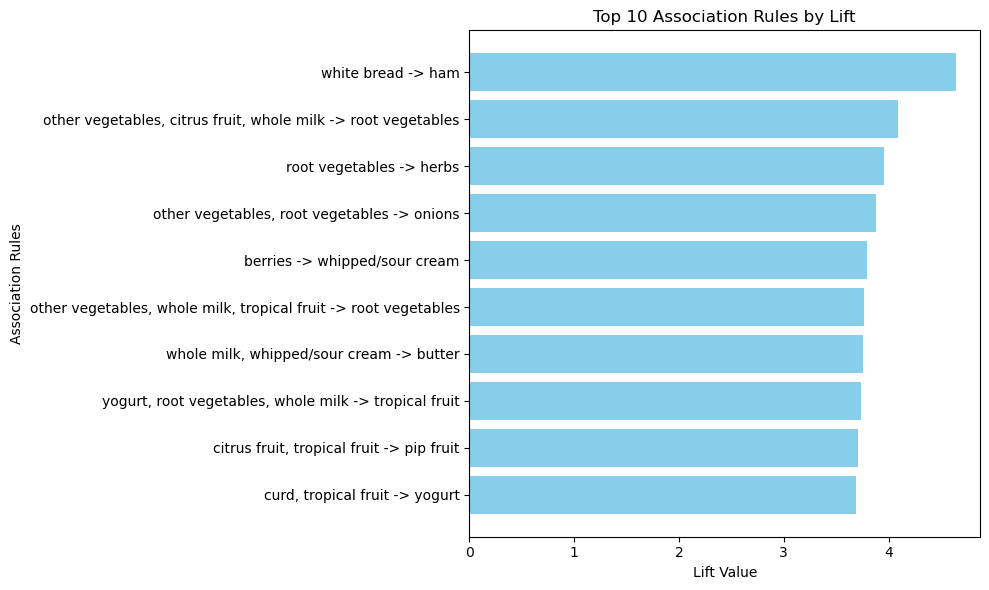

In [21]:
top_rules = rules2.nlargest(10, 'lift')

associations = top_rules['rules_ass']
lift_values = top_rules['lift']

plt.figure(figsize=(10, 6))
plt.barh(associations, lift_values, color='skyblue')
plt.xlabel('Lift Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest lift at the top
plt.tight_layout()

plt.show()

**Intuitive Association Insights:**

The associations we've observed through our analysis align well with natural customer shopping behaviors. A prime example of this is the association between customers purchasing bread and their potential interest in ham. This connection is intuitive – customers buying bread are likely considering making sandwiches, hence the inclination to buy ham as well.

Moreover, our findings also underscore common purchasing patterns, such as the frequent association between customers selecting fruits and vegetables. This behavior mirrors the well-known trend of customers opting for a variety of produce items in a single shopping trip.

Additionally, our analysis reveals consistent connections among various dairy products. The tendency for customers to choose multiple dairy items, such as milk, curd, and yogurt, reaffirms the familiar preference for stocking up


#### Let's look at top 10 associations based on support

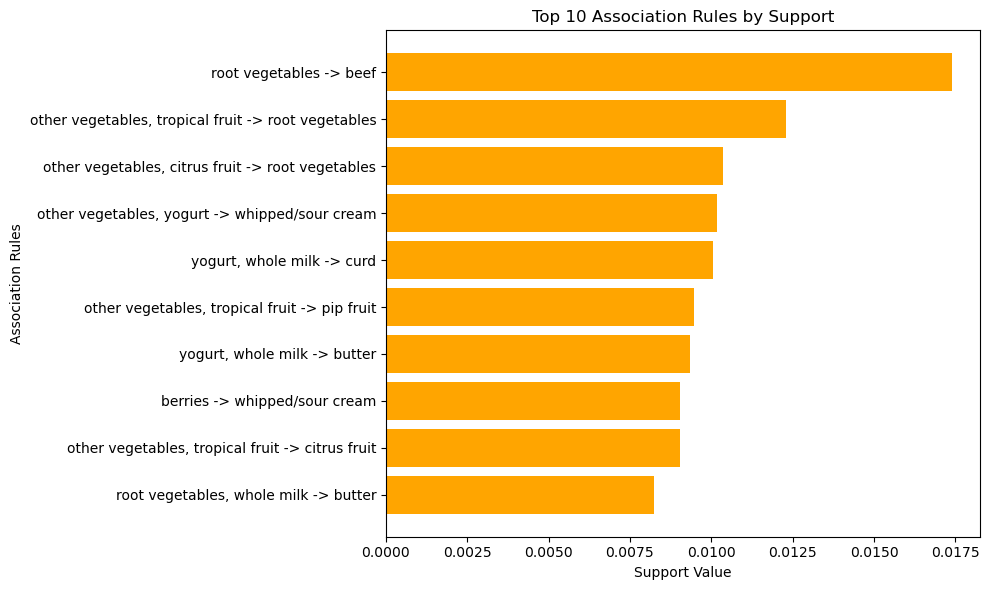

In [25]:
top_rules = rules2.nlargest(10, 'support')

associations = top_rules['rules_ass']
sup_values = top_rules['support']

plt.figure(figsize=(10, 6))
plt.barh(associations, sup_values, color='orange')
plt.xlabel('Support Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Support')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest lift at the top
plt.tight_layout()

plt.show()

**Support-Based Rule Validation:**

Upon examining the association rules through the lens of support, our initial findings are validated once again. The observed association rules align seamlessly with anticipated natural customer shopping behavior. The notion that customers who purchase specific items tend to opt for related items as well is reinforced by the support values.

The support-based analysis underscores the consistent patterns we've uncovered – from the connection between bread and ham for sandwiches to the link between various dairy products. These associations, verified by their support values, mirror the predictable choices that customers make while shopping.

In essence, the support-based rule validation strengthens our confidence in the accuracy and significance of the observed association rules, which faithfully reflect the intuitive and expected shopping behavior of customers.
